In [4]:
import numpy as np
import matplotlib.pyplot as plt

#### The Goal
The goal is to perform simple Bayesian inference based around Bayes rule:
$$
\begin{equation}
p(s|\hat{y}) = \frac{p(\hat{y}|s)p(s)}{p(\hat{y})}
\end{equation}
$$
The following definitions apply:
$$
\begin{equation}
\begin{align}
  p(s) &= \mathcal{N}(0, 1)\\
  p(\hat{y}|s) &= \mathcal{N}(s, w)\\
  p(\hat{y}) &= \int p(\hat{y}|s) p(s) ds\\
  \hat{y} &= 1\\
  w &= 1
\end{align}
\end{equation}
$$
Some thing to contemplate is: what does is mean than $p(\hat{y}|s)$ is a normal distribution with a mean of $s$, which is of itself also a normal distribution? Practically it probabily implies that $mean(s)=mean(\hat{y})$.
#### Approach
- Define a Normal dist class
- think of something for the integration
- think of something for visualization


In [2]:
# The class
class Normal:
  def __init__(self, mu, sigma):
    self.mu = mu
    self.sigma = sigma
  
  def pdf(self, x):
    return 1/(np.sqrt(2*np.pi)*self.sigma)*np.exp(-0.5*((x-self.mu)/self.sigma)**2)
  

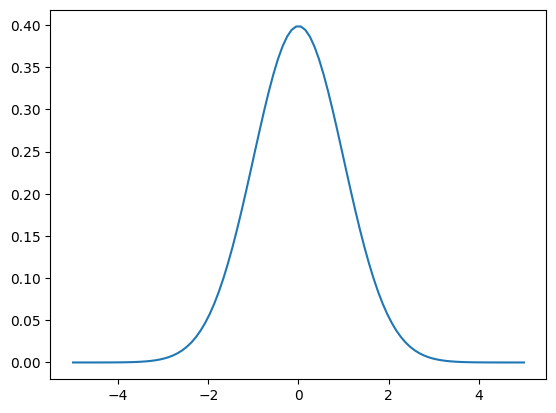

In [5]:
# Testing the class by visualization
test_dist = Normal(0, 1)
x = np.linspace(-5, 5, 100)
y = test_dist.pdf(x)
plt.plot(x, y)
plt.show()

In [6]:
# a function to perfrom numerical integration given a function

def integrate(f, a, b, N):
  dx = (b-a)/N
  x = np.linspace(a+0.5*dx, b-0.5*dx, N)
  return np.sum(f(x)*dx)

# Testing the integration function
print(integrate(test_dist.pdf, -5, 5, 1000))

0.999999426758799


1.4104739588693909


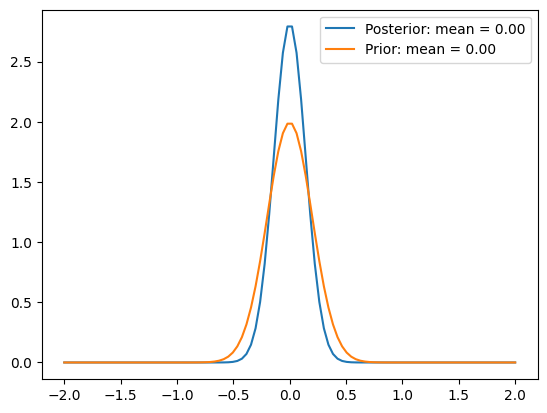

In [15]:
y_hat = 1
w = 0.2

p_s = Normal(0, 0.2)
p_y_hat_s = Normal(0, w)
p_y_hat = integrate(lambda s: p_s.pdf(s)*p_y_hat_s.pdf(s), -5, 5, 1000)

print(p_y_hat)

posterior = lambda s: p_s.pdf(s)*p_y_hat_s.pdf(s)/p_y_hat

#plotting the posterior
x = np.linspace(-2, 2, 100)
y1 = posterior(x)
y2 = p_s.pdf(x)
plt.plot(x, y1, label='Posterior: mean = {:.2f}'.format(integrate(lambda s: s*posterior(s), -5, 5, 1000)))
plt.plot(x, y2, label='Prior: mean = {:.2f}'.format(integrate(lambda s: s*p_s.pdf(s), -5, 5, 1000)))
plt.legend()
plt.show()

Something seems to be wrong: There is no side to side movement of the gaussian curve + `p_y_hat` seems to take on values larger than 1. Possibly this has to do with my interpretation of $p(\hat{y}|s)$. 

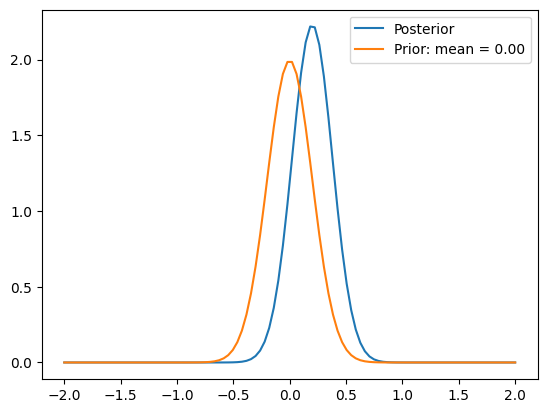

In [26]:
prior = Normal(0, 0.2)
y_hat=1
w=0.4

def posterior(S, y):
  result = []
  for s in S:
    likelihood = Normal(s, w).pdf(y)
    model_evidence = integrate(lambda s: prior.pdf(s)*Normal(s, w).pdf(y), -5, 5, 1000)
    result.append(prior.pdf(s)*likelihood/model_evidence)
  return result

# Plotting the prior and posterior
x = np.linspace(-2, 2, 100)
y1 = posterior(x, y_hat)
y2 = prior.pdf(x)
plt.plot(x, y1, label='Posterior')
plt.plot(x, y2, label='Prior: mean = {:.2f}'.format(integrate(lambda s: s*prior.pdf(s), -5, 5, 1000)))
plt.legend()
plt.show()

#### Yeah!!
This seems to work! 